In [ ]:
# Importing pandas to read data
import pandas as pd

In [ ]:
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Water_Quality.csv')
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
# Shape of the data
data.shape

(7996, 21)

# **Data preprocessing**

In [ ]:
# Checking null values in dataset
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
# Counting labels
data['is_safe'].value_counts(normalize=True)

0    0.885943
1    0.114057
Name: is_safe, dtype: float64

In [ ]:
# Defining input and output features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
# Checking shape of input-output features
print(X.shape)
print(y.shape)

(7996, 20)
(7996,)


In [ ]:
X

array([[1.650e+00, 9.080e+00, 4.000e-02, ..., 8.000e-02, 3.400e-01,
        2.000e-02],
       [2.320e+00, 2.116e+01, 1.000e-02, ..., 8.000e-02, 2.700e-01,
        5.000e-02],
       [1.010e+00, 1.402e+01, 4.000e-02, ..., 7.000e-02, 4.400e-01,
        1.000e-02],
       ...,
       [9.000e-02, 6.850e+00, 0.000e+00, ..., 0.000e+00, 4.000e-02,
        5.000e-02],
       [1.000e-02, 1.000e+01, 1.000e-02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.000e-02, 6.850e+00, 1.000e-02, ..., 0.000e+00, 4.000e-02,
        5.000e-02]])

As we can see the feature values are not in range and especially neural networks are highly sensitive to these kinds of feature distribution. So let’s scale all values using a Standard scaler from the sklearn library. 

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
X

array([[ 0.77740287, -0.58549134, -0.48087476, ...,  1.05369443,
         1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -0.59963176, ...,  1.05369443,
         0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.48087476, ...,  0.70612871,
         2.03531047, -1.28872776],
       ...,
       [-0.45556091, -0.83666343, -0.63921743, ..., -1.72683135,
        -0.75098648,  0.19802266],
       [-0.51878982, -0.48186877, -0.59963176, ..., -1.72683135,
        -1.02961617, -1.66041536],
       [-0.49507898, -0.83666343, -0.59963176, ..., -1.72683135,
        -0.75098648,  0.19802266]])

The input training patterns have 20 features to train which is a pretty high number of features to train the model, below by using PCA we will determine whether we can reduce the number of features. 

In [ ]:
# Fitting PCA to analyze components
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

PCA()

We have fitted the PCA model on our training dataset, let’s obtain the variance vs component plot to check how many features explain more than 90% variance. 

Text(0.5, 1.0, 'Scree plot')

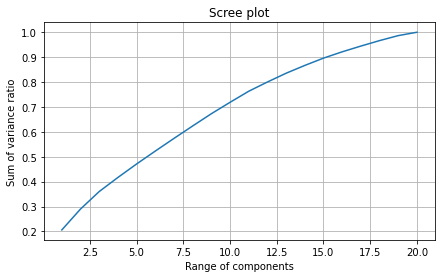

In [ ]:
# Variance Vs Component plot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,4))
plt.plot(range(1,21,1),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Sum of variance ratio')
plt.xlabel('Range of components')
plt.grid()
plt.title('Scree plot')

In [ ]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6396, 20)
(6396,)
(1600, 20)
(1600,)


# **Defining the neural net classifier**

In [ ]:
# Libraries for neural networks
from keras.models import Sequential
from keras.layers import Dense

We will create the sequential model, where we will cover all layers of the network like input, hidden and output layers. Our model will be the only three-layer model which can be defined as shown below. 

In [ ]:
# Defining the neural network model
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
#model.add(Dense(48, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Summary of the neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                252       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the classifier
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# **Training the neural net classifier**

In [ ]:
# Training the classifier
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
640/640 [==============================] - 2s 2ms/step - loss: 0.4642 - accuracy: 0.8316
Epoch 2/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3283 - accuracy: 0.8857
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3041 - accuracy: 0.8856
Epoch 4/100
640/640 [==============================] - 1s 1ms/step - loss: 0.2870 - accuracy: 0.8857
Epoch 5/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2707 - accuracy: 0.8895
Epoch 6/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2541 - accuracy: 0.8982
Epoch 7/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2383 - accuracy: 0.9074
Epoch 8/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2244 - accuracy: 0.9140
Epoch 9/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2134 - accuracy: 0.9201
Epoch 10/100
640/640 [==============================] - 1s 2ms/step - loss: 0.2046 - accura

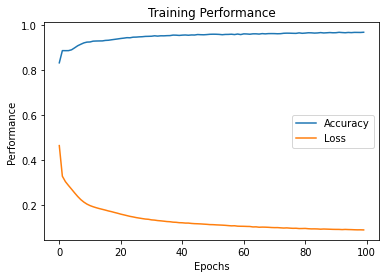

In [ ]:
# Plotting the performance
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['loss'], label = 'Loss')
plt.title('Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

# **Predicting class labels**

In [ ]:
# Making predictions with the trained classifier
predictions = model.predict(X_test)
predictions

array([[1.6779691e-02],
       [1.8045950e-01],
       [5.5047870e-04],
       ...,
       [6.7721373e-08],
       [5.4460764e-04],
       [1.0168020e-06]], dtype=float32)

In [ ]:
# Rounding off the predictions
y_pred = [round(x[0]) for x in predictions]
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


# **Evaluating the performance**

In [ ]:
# Confusion matrix of predictions on test data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1396,   23],
       [  54,  127]])

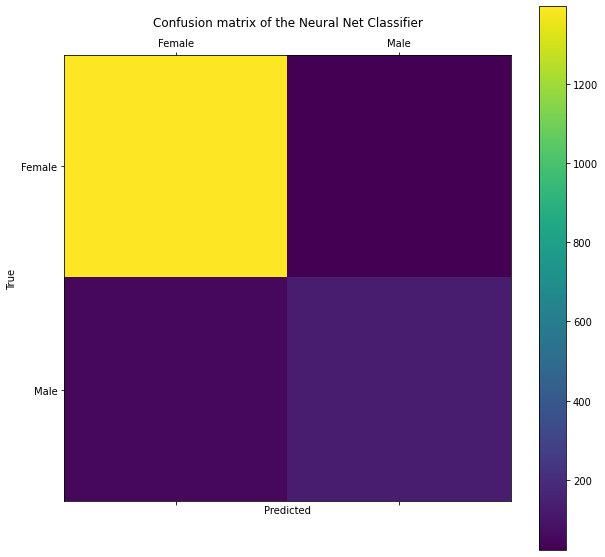

In [ ]:
# Plotting the confusion matrix
import sys
from pylab import *
cm = confusion_matrix(y_test, y_pred)
labels = ['Female', 'Male']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Neural Net Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1419
           1       0.85      0.70      0.77       181

    accuracy                           0.95      1600
   macro avg       0.90      0.84      0.87      1600
weighted avg       0.95      0.95      0.95      1600

